https://hyperconnect.github.io/2020/03/09/prophet-package.html

https://m-insideout.tistory.com/13

https://skyeong.net/290

# 1. Python Prophet

## 1.1 <a href = 'https://dining-developer.tistory.com/25'>밥먹는 개발자</a>

- Prophet 라이브러리는 일변량 시계열 데이터셋(Univariate Time Series Datasets)을 예측하기 위해 설계된 오픈소스 라이브러리이다.


- additive time series forecasting model을 참고해 구현되었으며, **경향성(Trends), 계절성(Seasonality), 휴일(Holiday)** 을 지원하는 모델이다.


- 기본적으로 추세나 계절적 구조를 가진 데이터에 대해 모델데 적합한 Hyperparameters를 자동으로 찾을 수 있도록 설계되어있어 사용하기 쉽다.

In [1]:
# prophet 라이브러리 불러오기
import fbprophet
print(fbprophet.__version__)

0.7.1


In [64]:
import platform

import pandas as pd

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'
    
# prophet 모델 라이브러리
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error

### [가]. 데이터 불러오기

In [20]:
# '자동차 판매 데이터' 불러오기
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv')

print('Shape of data :', data.shape, '\n')
print(data.info(), '\n')
display(data.head())

Shape of data : (108, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None 



,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


### [나]. 데이터 시각화

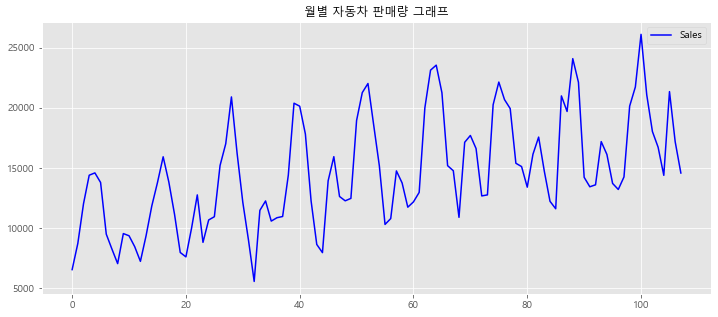

In [18]:
# 판매가 시각화하기
data.plot(figsize = (12, 5), color = 'blue')
plt.title('월별 자동차 판매량 그래프', fontsize = 12)
plt.show()

### [다]. prophet 모델 생성 후 학습

- prophet 모델을 학습 시키기 위해서는 scikit-learn처럼 모델을 생성하고 데이터를 전달한 뒤 fit() 함수를 호출하면 된다.


- 단, 함수에 넣는 데이터의 첫 번째 컬럼명은 **'ds'**, 두 번째 컬럼명은 **'y'** 이어야 한다.

In [24]:
# 데이터 컬럼명 변경
data.columns = ['ds', 'y']

# 날짜형 타입으로 변경
data['ds'] = pd.to_datetime(data['ds'])

# 모델 생성 후 학습시키기
model = Prophet()
model.fit(data)
print(model)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- Prophet 객체가 생성되고 학습된것을 확인할 수 있다.

### [라]. In-Sample Forecast

- 미래를 예측하기 전에 학습된 모델이 잘 예측되는지 확인해볼 필요가 있으며, 이를 **In-Sample Forecast**라고 한다.


- 즉, train data를 얼마나 잘 학습했는가를 판단하는 과정이다.

In [35]:
# 데이터의 날짜 확인
print('최소 날짜 :', data['ds'].min(), '\n')
print('최대 날짜 :', data['ds'].max())

최소 날짜 : 1960-01-01 00:00:00 

최대 날짜 : 1968-12-01 00:00:00


In [41]:
# Train data의 마지막 1년 날짜 생성
train_predict = pd.date_range(start = '1968-01-01', end = '1968-12-01', freq = 'MS')
train_predict = pd.DataFrame(train_predict, columns = ['ds'])
display(train_predict)

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [43]:
# 학습시킨 모델로 예측하기
forecast = model.predict(train_predict)

# 예측 결과 일부분 확인
display(forecast.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17808.744843,12790.381352,15927.855921,17808.744843,17808.744843,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,0.0,0.0,0.0,14344.429315
1,1968-02-01,17864.170853,13277.746985,16392.098727,17864.170853,17864.170853,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,0.0,0.0,0.0,14911.718770
2,1968-03-01,17916.020991,19248.381595,22491.944534,17916.020991,17916.020991,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,0.0,0.0,0.0,20859.142961
3,1968-04-01,17971.447001,21268.684710,24560.747238,17971.447001,17971.447001,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,0.0,0.0,0.0,22883.352978
4,1968-05-01,18025.085075,22585.667418,25709.650529,18025.085075,18025.085075,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,0.0,0.0,0.0,24183.139264


- 위의 예측 결과를 보면 다양한 정보를 포함학도 있으며 이 중에서 눈여겨 볼만한 정보는 yhat, yhat_lower, yhat_upper 이다.


- 각각 예측값, 하한값, 상한값을 나타낸다.

In [44]:
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14344.429315,12790.381352,15927.855921
1,1968-02-01,14911.718770,13277.746985,16392.098727
2,1968-03-01,20859.142961,19248.381595,22491.944534
3,1968-04-01,22883.352978,21268.684710,24560.747238
4,1968-05-01,24183.139264,22585.667418,25709.650529


- 위의 결과처럼 숫자로만 결과를 확인할 경우 해석하기 어렵다는 점이 있다.


- 하지만 prophet 라이브러리를 사용하면 데이터를 처리할 필요없이 내장 함수 **plot()** 을 사용하여 그래프를 손쉽게 볼 수 있다.

```python
Prophet().fit(학습시킬 데이터).plot(예측결과)
```

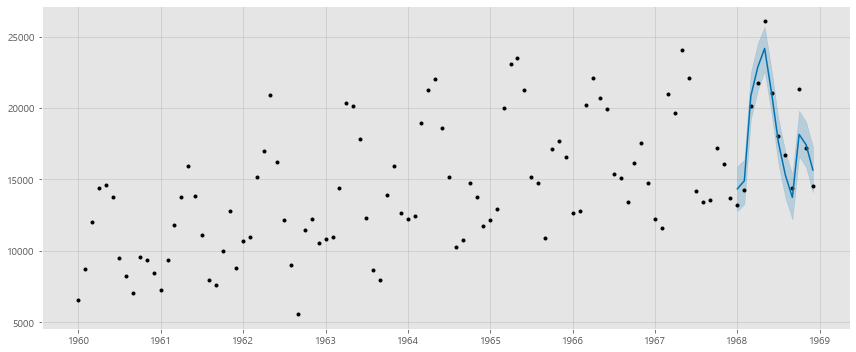

In [48]:
# 모델 결과 시각화하기
model.plot(forecast, figsize = (12, 5), xlabel = '', ylabel = '')
plt.show()

- 검은색 점들이 학습으로 사용된 데이터이고 파란색 선이 학습시킨 모델로 예측한 값이며, 하늘색 범위는 상한선과 하한선을 나타낸다.


- 실제 데이터와 큰 차이가 없는 것으로 보아, 잘 학습되었다는 것을 알 수 있다.

### [마]. Out-Of-Sample Forecast

- 모델을 학습시키기 위해 사용했던 데이터 외에 미래를 예측해야 하며, 이를 **Out-Of-Sample Forecast**라고 한다.


- 학습 데이터 직후 12개월의 데이터를 만들어 예측을 수행해보도록 하자.

In [50]:
# Test data 생성
test_data = pd.date_range(start = '1969-01-01', end = '1969-12-01', freq = 'MS')
test_data = pd.DataFrame(test_data, columns = ['ds'])
display(test_data)

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


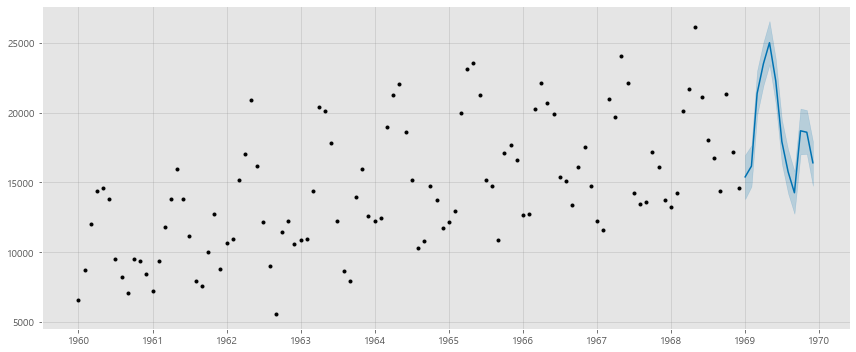

In [51]:
# Test data 예측 후, 시각화
pred = model.predict(test_data)

# 모델 결과 시각화하기
model.plot(pred, figsize = (12, 5), xlabel = '', ylabel = '')
plt.show()

### [바]. 모델 평가하기

- 현재 데이터에서는 Test data를 예측 후, 눈으로 모델을 평가해야 한다.


- 하지만 실제 분석 과정에서 눈으로만 모델을 평가해서는 안되며, 객관적인 값으로 평가를 수행해야 한다.


- 데이터에서 마지막 12개월을 Test data로 지정 후 학습시킨 뒤, 객관적인 지표로 확인해보도록 하자.


- 모델 평가를 절대 오차 평균(MAE: Mean Absolute Error)으로 하자.

In [74]:
# 마지막 12개월을 Test data로 지정하기
train = data.drop(data.index[-12:])
y = data['y'][-12:].values

test = pd.DataFrame(pd.date_range(start = '1968-01-01', end = '1968-12-01', freq = 'MS'), columns = ['ds'])

# 모델 생성 후 학습시키기
model = Prophet()
model.fit(train)

# 예측값 생성
y_pred = model.predict(test)

# MAE 계산
mae = mean_absolute_error(y, y_pred['yhat'])
print()
print('MAE = {}'.format(mae))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



MAE = 1336.8137661823862


- MAE가 작을수록 좋은 모델임을 나타낸다.


- 실제 데이터와 예측 데이터를 그래프를 통해서 살펴보도록 하자.

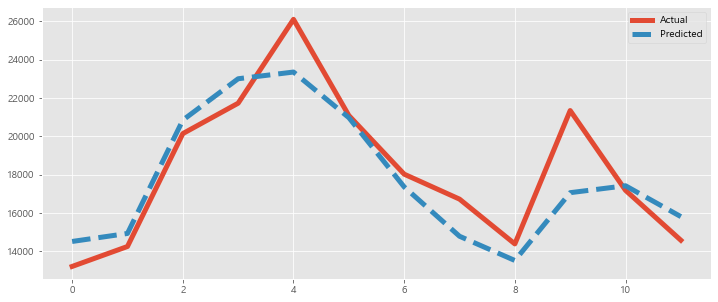

In [76]:
plt.figure(figsize = (12, 5))

plt.plot(y, label = 'Actual', linewidth = 5)
plt.plot(y_pred['yhat'], label = 'Predicted', linewidth = 5, linestyle = '--')
plt.legend()
plt.show()

## 1.2 <a href='https://hyperconnect.github.io/2020/03/09/prophet-package.html'>HYPER CONNECT 기술 블로그</a>

### [가]. 이론

- Prophet 모델의 주요 구성요소는 Trend, Seasonality, Holiday 이며, 이 세가지를 결합하면 아래의 공식으로 나타낼 수 있다.

> $$y(t)=g(t)+s(t)+h(t)+\epsilon_i$$
> - $g(t)$ : piecewise linear or logistic growth curve for modelling non-periodic changes in time series
> - $s(t)$ : periodic changes (e.g. weekly/yearly seasonality)
> - $h(t)$ : effects of holidays (user provided) with irregular schedules
> - $\epsilon_i$ : error term accounts for any unusual changes not accommodated by the model


- 위에서 **Trend**를 구성하는 $g(t)$ 함수는 주기적이지 않은 볁화의 트렌드를 나타내며, 부분적으로 선형 또는 logistic 곡선으로 이루어져 있다.


- **Seasonality**인 $s(t)$ 함수는 weekly, yearly 등 주기적으로 나타나는 패턴들을 포함한다.


- **Holiday**를 나타내는 $h(t)$ 함수는 휴일과 같이 불규칙한 이벤트들을 나타낸다.


- 만약 특정 기간에 값이 비정상적으로 증가 도는 감소했다면, holiyday로 정의하여 모델에 반영할 수 있다.


- 마지막으로 $\epsilon_i$는 정규분포라고 가정한 오차이다.

In [1]:
import pandas_datareader.data as web

In [2]:
web.DataReader(name = 'LAC', data_source = 'yahoo', start = '2018-01-01', end = '2018-02-01')

SSLError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/LAC/history?period1=1514746800&period2=1517511599&interval=1d&frequency=1d&filter=history (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1131)')))